In [129]:
import keras
import numpy as np
import csv
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
import json
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [127]:
df_lt=pd.read_csv(r"Courier_lifetime_data.csv", sep=",")
df_w=pd.read_csv(r"Courier_weekly_data.csv", sep=",")

In [4]:
df_lt.head()

,courier,feature_1,feature_2
0,208,a,25.0
1,218,c,0.0
2,225,c,NaN
3,231,c,0.0
4,242,c,NaN


In [5]:
df_w.head()

,courier,week,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
0,3767,2,6,34,38,0.0789,0.9211,140.4737,0.1316,2162.4737,0.7632,7.340776,8,20.208158,5.236316,0.8158,43.384804,1,19
1,3767,4,-1,42,37,0.0000,1.0000,135.5946,0.0811,2097.4054,0.9459,11.883784,19,18.855405,5.689459,0.8919,35.078042,3,11
2,3767,5,24,41,43,0.0233,0.9767,131.0930,0.0233,2043.8837,0.9302,7.072100,16,18.925116,5.138605,0.9302,31.455285,1,10
3,3767,6,-22,65,66,0.0606,0.9394,120.1515,0.0000,2124.2727,0.7727,7.356567,33,18.259697,4.704394,0.7879,34.252991,1,30
4,6282,2,9,33,27,0.0741,0.9259,100.0000,0.0370,4075.7407,0.8889,8.501233,5,26.863704,4.828519,0.8889,46.478114,1,4


# TASK 1

## First analysis :

In [7]:
df_lt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7524 entries, 0 to 7523
Data columns (total 3 columns):
courier      7524 non-null int64
feature_1    7524 non-null object
feature_2    6588 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 176.4+ KB


In [8]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 19 columns):
courier       4117 non-null int64
week          4117 non-null int64
feature_1     4117 non-null int64
feature_2     4117 non-null int64
feature_3     4117 non-null int64
feature_4     4117 non-null float64
feature_5     4117 non-null float64
feature_6     4117 non-null float64
feature_7     4117 non-null float64
feature_8     4117 non-null float64
feature_9     4117 non-null float64
feature_10    4117 non-null float64
feature_11    4117 non-null int64
feature_12    4117 non-null float64
feature_13    4117 non-null float64
feature_14    4117 non-null float64
feature_15    4117 non-null float64
feature_16    4117 non-null int64
feature_17    4117 non-null int64
dtypes: float64(11), int64(8)
memory usage: 611.2 KB


In [9]:
df_lt.describe()

,courier,feature_2
count,7524.000000,6588.000000
mean,518864.440324,26.373862
std,286880.574472,22.703621
min,208.000000,-61.000000
25%,275875.750000,20.000000
50%,529366.500000,25.000000
75%,803120.500000,32.000000
max,964240.000000,954.000000


In [11]:
df_w.describe()

,courier,week,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.00000
mean,366530.934418,4.910857,-3.702453,44.232208,55.691037,0.068610,0.931390,104.331502,0.059339,3975.807328,0.767527,9.619359,20.266942,20.000994,5.211435,0.782381,68.655642,2.255526,12.78941
std,128603.611959,3.364852,17.407331,24.007116,31.666550,0.068999,0.068999,8.473348,0.064646,1237.055134,0.136458,1.827863,12.460020,3.205479,0.961980,0.164578,18.828885,1.542969,11.69108
min,3767.000000,0.000000,-138.000000,1.000000,1.000000,0.000000,0.000000,92.857100,0.000000,1136.750000,0.000000,2.575000,0.000000,5.416667,3.270000,0.000000,2.957809,1.000000,1.00000
25%,280239.000000,2.000000,-12.000000,26.000000,31.000000,0.018500,0.901200,100.000000,0.000000,2750.977800,0.693700,8.424751,11.000000,18.168824,4.570099,0.739100,57.839947,1.000000,5.00000
50%,406936.000000,5.000000,-2.000000,41.000000,51.000000,0.054100,0.945900,100.465100,0.043500,4099.425000,0.785700,9.497961,19.000000,19.648810,5.072500,0.822200,71.653595,2.000000,10.00000
75%,467727.000000,8.000000,6.000000,59.000000,76.000000,0.098800,0.981500,104.766000,0.088200,4774.028200,0.864200,10.607692,28.000000,21.335395,5.618522,0.883700,82.180556,3.000000,17.00000
max,519341.000000,11.000000,77.000000,169.000000,189.000000,1.000000,1.000000,197.739100,0.666700,12593.900000,1.000000,20.546667,86.000000,66.400000,12.546923,1.000000,180.861111,13.000000,195.00000


In [128]:
df_w_corr = df_w.corr()


             courier      week  feature_1  feature_2  feature_3  feature_4  \
courier     1.000000 -0.024238   0.016642  -0.276750  -0.093481  -0.119213   
week       -0.024238  1.000000  -0.084761   0.098734   0.095960  -0.206059   
feature_1   0.016642 -0.084761   1.000000  -0.212915  -0.132828  -0.029416   
feature_2  -0.276750  0.098734  -0.212915   1.000000   0.788146   0.188848   
feature_3  -0.093481  0.095960  -0.132828   0.788146   1.000000   0.162444   
feature_4  -0.119213 -0.206059  -0.029416   0.188848   0.162444   1.000000   
feature_5   0.119214  0.206057   0.029420  -0.188848  -0.162446  -1.000000   
feature_6  -0.074533 -0.059651   0.063833   0.039640   0.062238  -0.073383   
feature_7  -0.016657 -0.253702   0.056426  -0.003138   0.027473   0.038013   
feature_8  -0.115310 -0.192313  -0.008650   0.133437   0.068195   0.227298   
feature_9   0.015373  0.302481   0.057826  -0.152309  -0.103423  -0.636237   
feature_10  0.086274 -0.165839   0.062050  -0.146601  -0.173151 

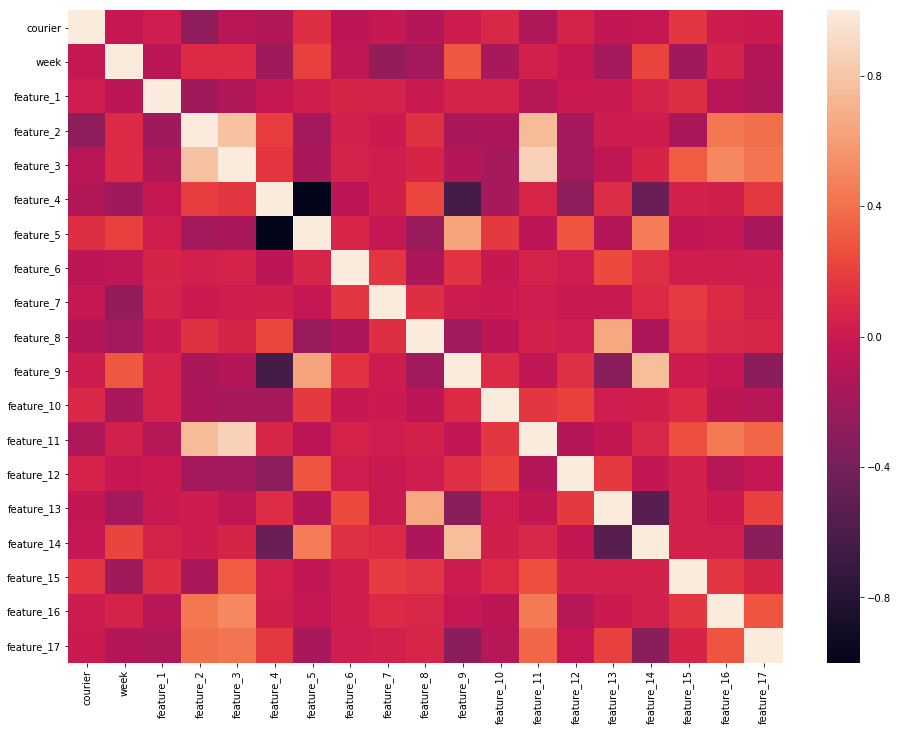

In [133]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_w_corr, 
            xticklabels = df_w_corr.columns.values,
            yticklabels = df_w_corr.columns.values,
            annot = False);
print(df_w_corr)

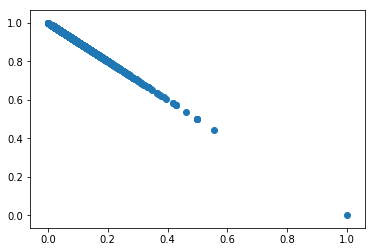

In [136]:
plt.scatter(df_w.feature_4,df_w.feature_5)

We can notice that some features are highly correlated: We have thus 2 possibilities:
- Get rid of some features (remove feature_5 for instance)
- Do a dimension reduction using CPA for instance

## Missing values:

In [13]:
#treat missing values of df_lt:
print(df_lt.isnull().sum())

courier        0
feature_1      0
feature_2    936
dtype: int64


There is 936 missing values is the lifetime dataframe. (12.4% of the dataset). <br>
There is several technics to deal with it: 
- remove the NaN values (but we loose quit some information) 
- replace the NaN by a unique value (A good choice would be the mean of the feature)
- create a regression model to predict the missing values regarding the others features. <br>
We will do the third option which is the best one. However. It is not guarented at this stage that every courier with a missing value in df_lt.features_2 is present in df_w. <br> <br>
Thus; 
- For the courier present in both tables we will predict the missing values using a regression with the differents features . 
- For the one not in df_w, we'll replace the NaN by the mean of df_lt.feature_2 conditionned by df_lt.feature_1 (mean for categories 1, 2 and 3).

In [21]:
# Inner Join of the DataFrames:
df_merged = pd.merge(df_lt, df_w, how='inner', on=['courier', 'courier'],suffixes=['_lt',''])

In [63]:
#df_merged.head()
print(df_merged.feature_2_lt.isnull().sum(), len(df_merged),len(df_merged.dropna()))

342 4117 3775


- 936 missing values 
- 342 for a courier present in df_w
- 594 only in df_lt

In [105]:
df_train_NaN = pd.concat([pd.get_dummies(df_merged.feature_1_lt),df_merged], axis=1)
df_train_NaN=df_train_NaN.dropna()
df_target_NaN=df_train_NaN[['courier','feature_2']]
df_train_NaN=df_train_NaN.drop(columns=['feature_1_lt','feature_2_lt'],axis=1)
df_train_NaN.reset_index(drop=True,inplace=True)
df_target_NaN.reset_index(drop=True,inplace=True)

Normalization of the features:

In [81]:
def normalize(col):
    dataNorm=((col-col.min())/(col.max()-col.min()))
    return dataNorm

In [112]:
df_train_NaN=pd.concat([df_train_NaN.iloc[:,0:4],(normalize(df_train_NaN.iloc[:,6:]))],axis=1)

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg = LinearRegression()

#training with the training set:
reg.fit(df_train_NaN,df_target_NaN)
reg.score(df_train_NaN,df_target_NaN)

#prediction of every 'feature_2_lt' values and replacement of the 342 missing values corresponding to a courier present in df_w
df_pred_missing=

array([-1.47260932e+01, -6.96033554e+00, -1.00778592e+01, -1.50059268e+27,
       -1.65948199e+02])

Replacing of the rest:

In [36]:
mean_cat=[]
for i , x in enumerate(df_lt.feature_1.unique()):
    mean_cat.append([x,np.mean(df_lt[df_lt.feature_1==x].feature_2)])
mean_cat=pd.DataFrame(mean_cat,columns=['feature_1_lt','mean_feature_2_lt'])
mean_cat

,feature_1_lt,mean_feature_2_lt
0,a,30.709663
1,c,20.333333
2,d,32.305882
3,b,23.306551


In [123]:
df_merged[df_merged.feature_2_lt.isnull()]

,courier,feature_1_lt,feature_2_lt,week,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
29,18869,a,NaN,2,-19,114,60,0.2167,0.7833,100.0000,...,5386.1500,0.5500,8.693060,16,18.569833,5.295500,0.6333,34.446150,2,11
30,18869,a,NaN,5,-16,121,63,0.1905,0.8095,100.0000,...,4458.5873,0.7143,9.510052,36,22.283651,5.086349,0.6984,32.527089,2,17
36,19450,d,NaN,3,52,89,28,0.3214,0.6786,138.3571,...,8228.5714,0.6786,12.576186,13,18.884643,10.917143,0.6786,38.850499,1,3
37,19450,d,NaN,8,31,77,13,0.4615,0.5385,186.1538,...,5284.0769,0.6154,15.430762,9,12.367692,12.546923,0.4615,23.594517,1,6
38,19450,d,NaN,9,1,108,28,0.0357,0.9643,117.7857,...,4891.6429,0.9286,10.633336,16,22.111429,6.710714,0.8929,20.103652,1,7
39,19450,d,NaN,10,-9,109,28,0.0714,0.9286,156.9286,...,4675.8214,0.7857,16.016668,27,32.965000,9.016429,0.7500,27.783639,1,9
57,41143,d,NaN,0,29,60,48,0.1250,0.8750,137.0625,...,10216.6667,0.6250,7.894790,10,18.024792,10.432500,0.6667,51.670833,1,14
58,41143,d,NaN,2,37,94,48,0.0625,0.9375,119.1042,...,6402.6250,0.7917,8.597567,18,24.206458,7.071667,0.8333,27.102837,3,11
59,41143,d,NaN,3,-48,131,50,0.0200,0.9800,105.6000,...,6660.5400,0.5400,8.612330,17,17.727000,6.646800,0.6400,22.038380,1,18
60,41143,d,NaN,4,44,83,28,0.0357,0.9643,113.9643,...,4390.3571,0.9286,6.423818,8,19.628571,5.769286,0.9286,15.747323,2,10


In [74]:
df_merged

,courier,feature_1_lt,feature_2_lt,week,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
0,3767,b,33.0,2,6,34,38,0.0789,0.9211,140.4737,...,2162.4737,0.7632,7.340776,8,20.208158,5.236316,0.8158,43.384804,1,19
1,3767,b,33.0,4,-1,42,37,0.0000,1.0000,135.5946,...,2097.4054,0.9459,11.883784,19,18.855405,5.689459,0.8919,35.078042,3,11
2,3767,b,33.0,5,24,41,43,0.0233,0.9767,131.0930,...,2043.8837,0.9302,7.072100,16,18.925116,5.138605,0.9302,31.455285,1,10
3,3767,b,33.0,6,-22,65,66,0.0606,0.9394,120.1515,...,2124.2727,0.7727,7.356567,33,18.259697,4.704394,0.7879,34.252991,1,30
4,6282,a,35.0,2,9,33,27,0.0741,0.9259,100.0000,...,4075.7407,0.8889,8.501233,5,26.863704,4.828519,0.8889,46.478114,1,4
5,6282,a,35.0,3,-20,42,56,0.0536,0.9464,113.4821,...,4777.0714,0.9107,8.210125,16,23.651786,5.553571,0.9107,79.407407,2,5
6,6282,a,35.0,4,9,22,32,0.1250,0.8750,105.0000,...,5744.1875,0.8125,8.285422,12,18.180937,5.834375,0.7813,87.250000,1,2
7,6282,a,35.0,5,21,31,48,0.0417,0.9583,117.2500,...,4011.7708,0.9167,9.768052,17,20.346667,5.615417,0.9167,85.083333,2,9
8,6282,a,35.0,6,-12,52,72,0.0694,0.9306,107.6389,...,4000.3333,0.8472,7.736114,17,21.941111,5.093056,0.8750,73.904915,1,13
9,6282,a,35.0,7,1,40,56,0.0893,0.9107,124.3750,...,3192.0000,0.9107,7.405355,11,18.591071,5.353214,0.9107,65.618750,2,4
